In [118]:
# Import Data Science libraries
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Import Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster



In [120]:
# Load the CSV  
Countries_AQI_datapath = 'AQI and Lat Long of Countries.csv'

# Read the CSV file into a pandas DataFrame
Countries_AQI = pd.read_csv(Countries_AQI_datapath)

# Load the CSV containing country-to-continent mappings
continent_mapping_datapath = 'Countries by continents.csv'

# Read the CSV file into a pandas DataFrame
continent_mapping_data = pd.read_csv(continent_mapping_datapath)


In [122]:
# Display the Countries data 
print(Countries_AQI.shape)
Countries_AQI.info()

(16695, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [124]:
# Reset index after dropping rows
Countries_AQI_data=Countries_AQI.dropna(subset=['Country'])
Countries_AQI_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16393 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16393 non-null  object 
 2   AQI Value           16393 non-null  int64  
 3   AQI Category        16393 non-null  object 
 4   CO AQI Value        16393 non-null  int64  
 5   CO AQI Category     16393 non-null  object 
 6   Ozone AQI Value     16393 non-null  int64  
 7   Ozone AQI Category  16393 non-null  object 
 8   NO2 AQI Value       16393 non-null  int64  
 9   NO2 AQI Category    16393 non-null  object 
 10  PM2.5 AQI Value     16393 non-null  int64  
 11  PM2.5 AQI Category  16393 non-null  object 
 12  lat                 16393 non-null  float64
 13  lng                 16393 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.9+ MB


In [126]:
# Find duplicate data
duplicates_AQI_data = Countries_AQI_data[Countries_AQI_data.duplicated(subset=['Country', 'City'])].sort_values(by = ['City','Country'])


In [128]:
# Dropping Duplicates
AQI_data_cleaned = Countries_AQI_data.drop_duplicates(subset=['Country', 'City'], keep='first')
AQI_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13956 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             13956 non-null  object 
 1   City                13956 non-null  object 
 2   AQI Value           13956 non-null  int64  
 3   AQI Category        13956 non-null  object 
 4   CO AQI Value        13956 non-null  int64  
 5   CO AQI Category     13956 non-null  object 
 6   Ozone AQI Value     13956 non-null  int64  
 7   Ozone AQI Category  13956 non-null  object 
 8   NO2 AQI Value       13956 non-null  int64  
 9   NO2 AQI Category    13956 non-null  object 
 10  PM2.5 AQI Value     13956 non-null  int64  
 11  PM2.5 AQI Category  13956 non-null  object 
 12  lat                 13956 non-null  float64
 13  lng                 13956 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.6+ MB


In [130]:
# Rename the columns
AQI_data_cleaned = AQI_data_cleaned.rename(columns={

                                            'AQI Value':'Overall_AQI_Value', 
                                            'AQI Category':'Overall_AQI_Category',
                                            'CO AQI Value':'CO_AQI_Value',
                                            'CO AQI Category':'CO_AQI_Category', 
                                            'Ozone AQI Value':'Ozone_AQI_Value', 
                                            'Ozone AQI Category':'Ozone_AQI_Category',
                                            'NO2 AQI Value':'NO2_AQI_Value',
                                            'NO2 AQI Category':'NO2_AQI_Category', 
                                            'PM2.5 AQI Value':'PM2.5_AQI_Value', 
                                            'PM2.5 AQI Category':'PM2.5_AQI_Category', 
                                            'lat': 'Latitude',
                                            'lng': 'Longitude'
})

In [132]:
print(AQI_data_cleaned.shape)
AQI_data_cleaned.info()

(13956, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 13956 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               13956 non-null  object 
 1   City                  13956 non-null  object 
 2   Overall_AQI_Value     13956 non-null  int64  
 3   Overall_AQI_Category  13956 non-null  object 
 4   CO_AQI_Value          13956 non-null  int64  
 5   CO_AQI_Category       13956 non-null  object 
 6   Ozone_AQI_Value       13956 non-null  int64  
 7   Ozone_AQI_Category    13956 non-null  object 
 8   NO2_AQI_Value         13956 non-null  int64  
 9   NO2_AQI_Category      13956 non-null  object 
 10  PM2.5_AQI_Value       13956 non-null  int64  
 11  PM2.5_AQI_Category    13956 non-null  object 
 12  Latitude              13956 non-null  float64
 13  Longitude             13956 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.6+ MB


In [134]:
cities_continents_merged["Country"].nunique()

173

In [136]:
# Dictionary for standardizing country names
standard_country_names = {
    'United States of America': 'United States',
    'Russian Federation': 'Russia',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Viet Nam': 'Vietnam',
    'Myanmar':'Burma (Myanmar)',
    'United Republic of Tanzania':'Tanzania',
    'Democratic Republic of the Congo':'Congo',
    'Bolivia (Plurinational State of)':'Bolivia',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    'Burkina Faso':'Burkina', 
    "Côte d'Ivoire" : 'Ivory Coast',
    'Iran (Islamic Republic of)' : 'Iran',
    'Cabo Verde' : 'Cape Verde',
    'Republic of North Macedonia' : 'Macedonia',
    'North Macedonia' : 'Macedonia',
    'Republic of Moldova' : 'Moldova',
    "Lao People's Democratic Republic" : 'Laos',
    'State of Palestine' : 'Palestine',
    'Syrian Arab Republic' : 'Syria',
    'Kingdom of Eswatini' :'Swaziland',
    'Eswatini' :'Swaziland', 
    'Republic of Korea':'South Korea', 
    'Aruba' : 'Aruba', 
    'State of Palestine': 'Palestine',
    'Palestine': 'Palestine'
}
# Map the standard country names to the country column in cleaned dataframe   
AQI_data_cleaned['Country'] = AQI_data_cleaned['Country'].map(standard_country_names).fillna(AQI_data_cleaned['Country'])



In [138]:
cities_continents_merged = AQI_data_cleaned.merge(continent_mapping_data, on='Country', how='left')
cities_continents_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13956 entries, 0 to 13955
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               13956 non-null  object 
 1   City                  13956 non-null  object 
 2   Overall_AQI_Value     13956 non-null  int64  
 3   Overall_AQI_Category  13956 non-null  object 
 4   CO_AQI_Value          13956 non-null  int64  
 5   CO_AQI_Category       13956 non-null  object 
 6   Ozone_AQI_Value       13956 non-null  int64  
 7   Ozone_AQI_Category    13956 non-null  object 
 8   NO2_AQI_Value         13956 non-null  int64  
 9   NO2_AQI_Category      13956 non-null  object 
 10  PM2.5_AQI_Value       13956 non-null  int64  
 11  PM2.5_AQI_Category    13956 non-null  object 
 12  Latitude              13956 non-null  float64
 13  Longitude             13956 non-null  float64
 14  Continent             13954 non-null  object 
dtypes: float64(2), int6

In [140]:
cities_continents_merged.to_csv('cleaned_data.csv')

In [142]:
# Group by Country and calculate the average AQI
country_aqi = cities_continents_merged.groupby('Country')['Overall_AQI_Value'].mean().reset_index()

#Sort the countries by average AQI in descending order
country_aqi_sorted = country_aqi.sort_values(by='Overall_AQI_Value', ascending=False)

#Select only the top 20 countries
top_20_countries = country_aqi_sorted.head(20)


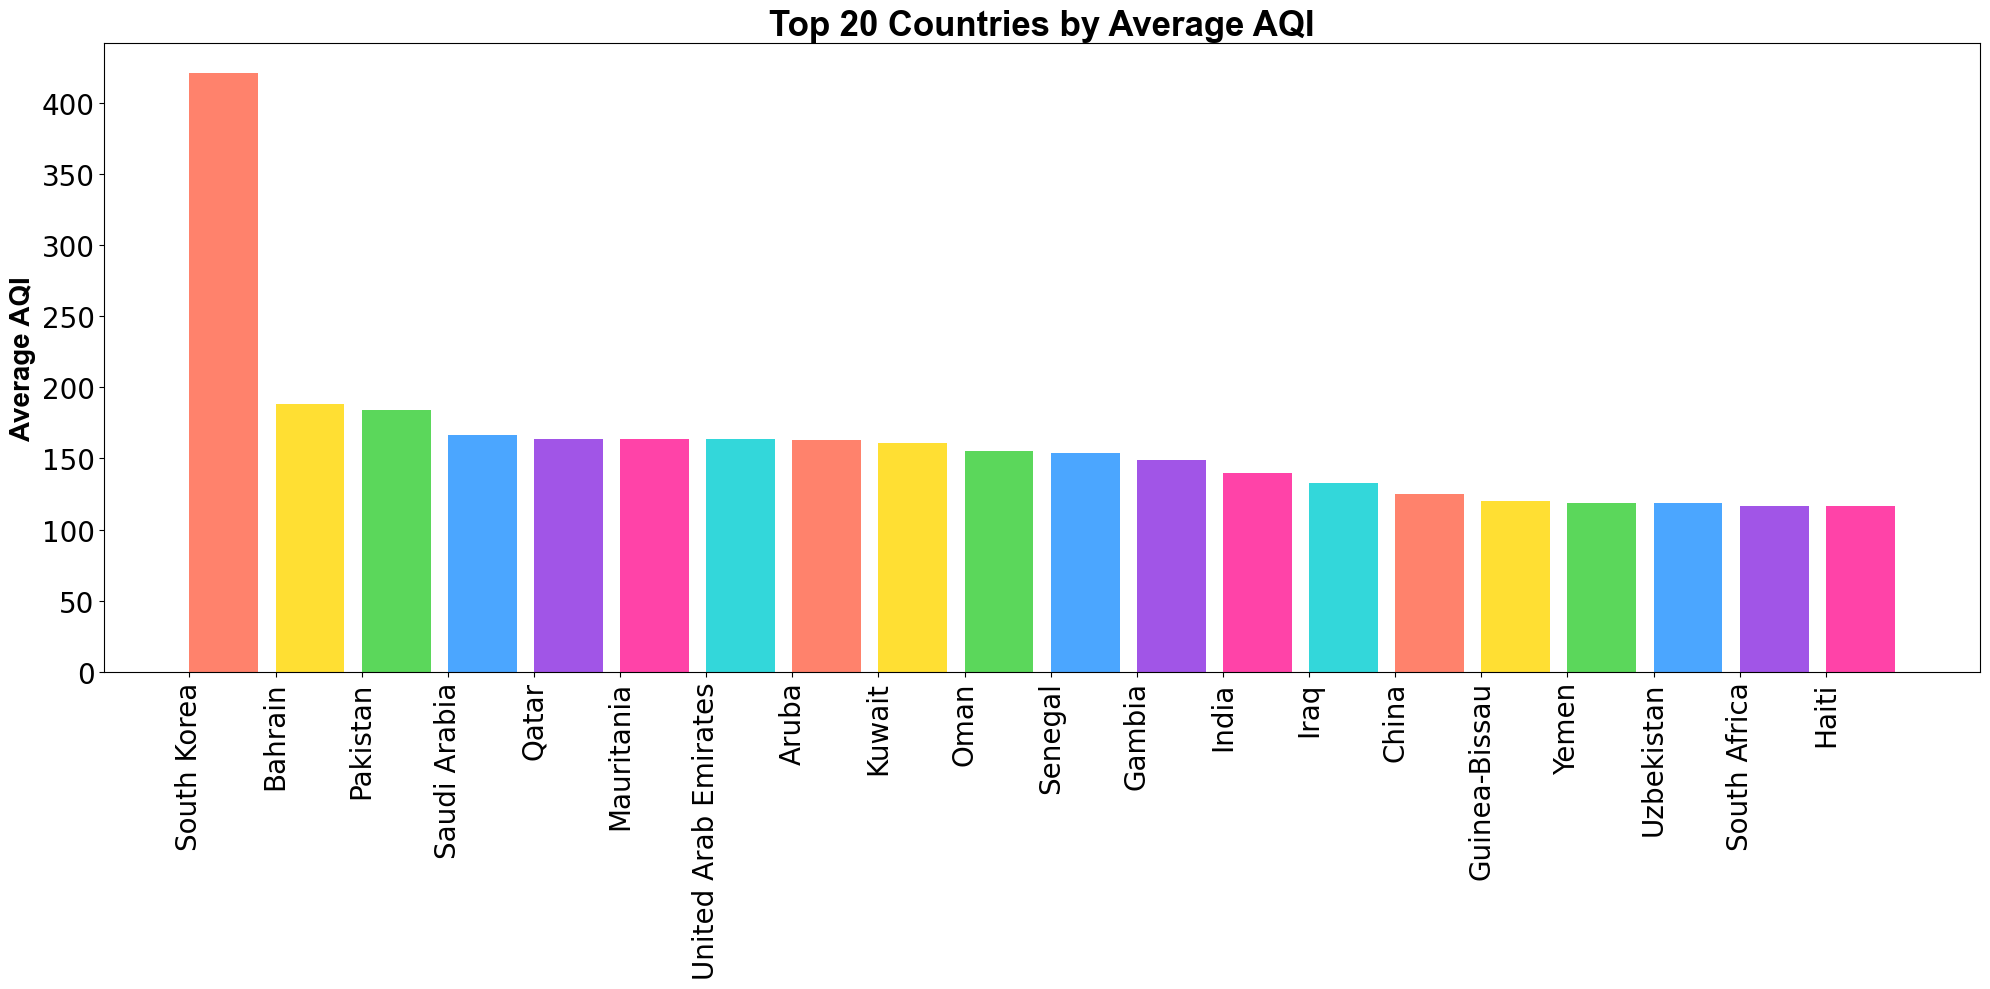

In [144]:
plt.figure(figsize=(20, 10)) 

# Set colors 
colors = ['#FF6347', '#FFD700', '#32CD32', '#1E90FF', '#8A2BE2', '#FF1493', '#00CED1']

# Plot the bar chart
plt.bar(top_20_countries['Country'], top_20_countries['Overall_AQI_Value'], color=colors, alpha=0.8, align="edge")

# Labels and title
plt.ylabel('Average AQI', fontweight="bold", fontsize=20, fontfamily="Arial")

plt.title('Top 20 Countries by Average AQI', fontweight="bold", fontsize=25, fontfamily="Arial")

# Adjust the tick positions and rotate labels
plt.xticks(top_20_countries['Country'], rotation="vertical", fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()

# Show the plot
plt.show()


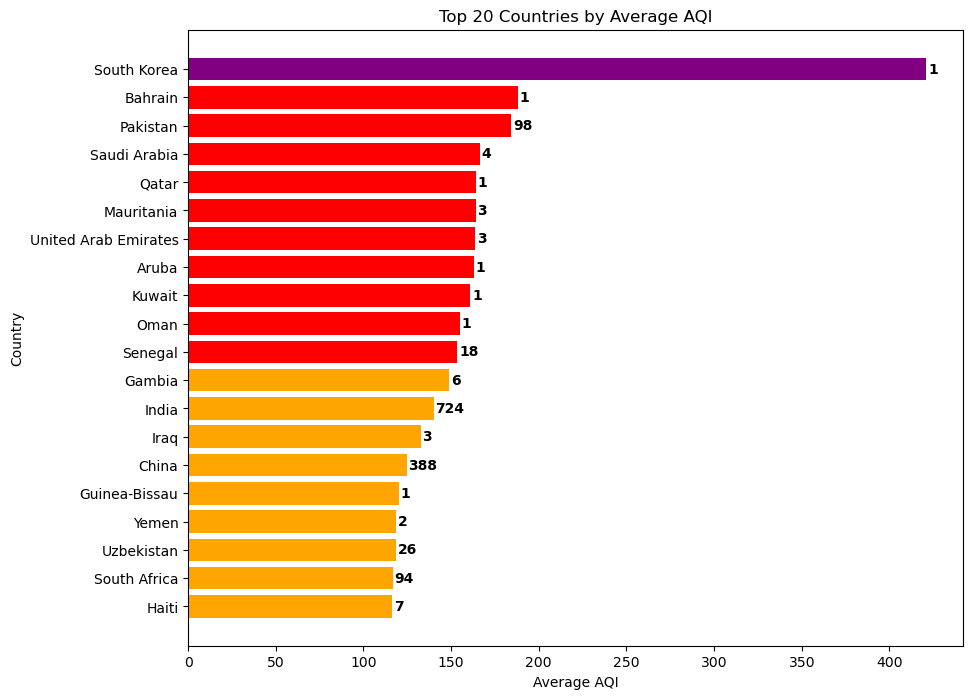

In [146]:
# 1. Group by 'Country' and calculate the average AQI
country_aqi = cities_continents_merged.groupby('Country')['Overall_AQI_Value'].mean().reset_index()

# 2. Count the number of cities for each country
country_city_count = cities_continents_merged.groupby('Country')['City'].nunique().reset_index()
country_city_count.rename(columns={'City': 'Num of Cities'}, inplace=True)

# 3. Merge the AQI data with the number of cities
country_aqi = pd.merge(country_aqi, country_city_count, on='Country')

# 4. Sort the countries by average AQI in descending order
country_aqi_sorted = country_aqi.sort_values(by='Overall_AQI_Value', ascending=False)

# 5. Define a function to assign colors based on AQI
def assign_color(aqi_value):
    if aqi_value < 100:
        return 'green'  
    elif aqi_value < 150:
        return 'orange' 
    elif aqi_value < 200:
        return 'red'
    else:
        return 'purple'

# 6. Assign the color column in dataframe
country_aqi_sorted['Color'] = country_aqi_sorted['Overall_AQI_Value'].apply(assign_color) #( Help from xpert learning)

# 7. Select only the top 20 countries 
top_20_countries = country_aqi_sorted.head(20)

# 8. Plot a horizontal bar plot 

plt.figure(figsize=(10, 8))  
bars = plt.barh(top_20_countries['Country'], top_20_countries['Overall_AQI_Value'], color=top_20_countries['Color'])
plt.xlabel('Average AQI')
plt.ylabel('Country')
plt.title('Top 20 Countries by Average AQI')
plt.gca().invert_yaxis() 

# 9. Annotate the bars with the number of cities( Help from xpert learning)
for bar, city_count in zip(bars, top_20_countries['Num of Cities']):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, str(city_count), 
             va='center', ha='left', color='black', fontweight='bold')

plt.show()

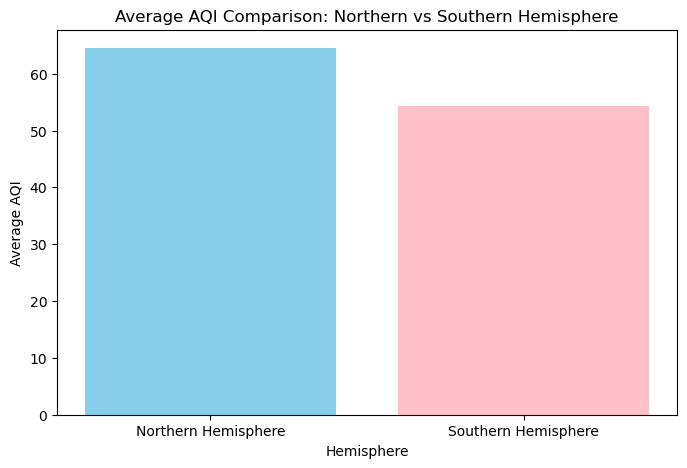

Average AQI in Northern Hemisphere: 64.51448264544186
Average AQI in Southern Hemisphere: 54.27473148671566


In [148]:
# Split the data into Northern and Southern Hemispheres
northern_hemisphere = cities_continents_merged[cities_continents_merged['Latitude'] > 0]
southern_hemisphere = cities_continents_merged[cities_continents_merged['Latitude'] < 0]

# Calculate average AQI for both hemispheres
avg_northern_hemisphere = northern_hemisphere['Overall_AQI_Value'].mean()
avg_southern_hemisphere = southern_hemisphere['Overall_AQI_Value'].mean()

# Plot the comparison
hemisphere_labels = ['Northern Hemisphere', 'Southern Hemisphere']
avg_aqi = [avg_northern_hemisphere, avg_southern_hemisphere]

plt.figure(figsize=(8, 5))
plt.bar(hemisphere_labels, avg_aqi, color=['skyblue', 'pink'])
plt.xlabel('Hemisphere')
plt.ylabel('Average AQI')
plt.title('Average AQI Comparison: Northern vs Southern Hemisphere')
plt.show()

# You can also print the results
print(f"Average AQI in Northern Hemisphere: {avg_northern_hemisphere}")
print(f"Average AQI in Southern Hemisphere: {avg_southern_hemisphere}")

In [152]:
# Count the frequency of AQI categories for each hemisphere
northern_counts = northern_hemisphere['Overall_AQI_Value'].value_counts()
southern_counts = southern_hemisphere['Overall_AQI_Value'].value_counts()

# Create DataFrames to store the counts for each hemisphere
northern_df = northern_counts.reset_index()
northern_df.columns = ['Overall_AQI_Category', 'Count']  
northern_df['Hemisphere'] = 'Northern Hemisphere'

southern_df = southern_counts.reset_index()
southern_df.columns = ['Overall_AQI_Category', 'Count'] 
southern_df['Hemisphere'] = 'Southern Hemisphere'



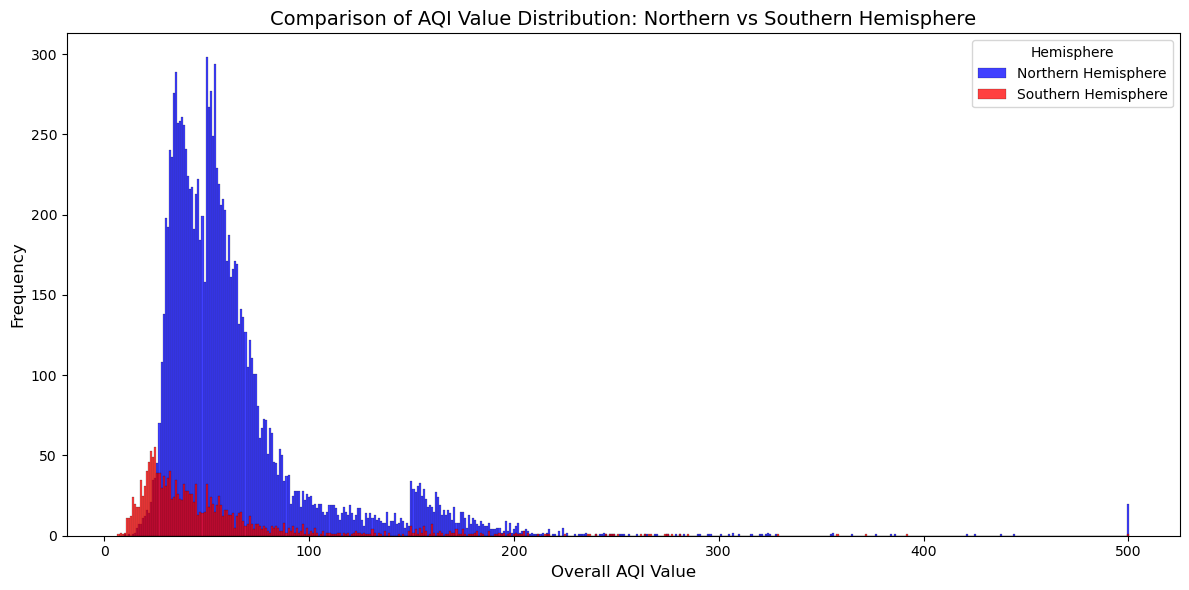

In [154]:
# Create a figure and axes for the plot
plt.figure(figsize=(12, 6))

# Plot the bar plot for Northern Hemisphere AQI values
sns.histplot(northern_hemisphere['Overall_AQI_Value'], color='blue', label='Northern Hemisphere', kde=False, bins=30, stat='count', discrete=True)

# Plot the bar plot for Southern Hemisphere AQI values
sns.histplot(southern_hemisphere['Overall_AQI_Value'], color='red', label='Southern Hemisphere', kde=False, bins=30, stat='count', discrete=True)

# Add labels and title
plt.title('Comparison of AQI Value Distribution: Northern vs Southern Hemisphere', fontsize=14)
plt.xlabel('Overall AQI Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Hemisphere')

# Display the plot
plt.tight_layout()
plt.show()


In [158]:
# List of AQI categories
aqi_categories = ['Good', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Very Unhealthy', 'Hazardous']

# Initialize a dictionary to store the counts of each AQI category for each pollutant
pollutant_categories_counts = {
    'CO_AQI_Category': {},
    'Ozone_AQI_Category': {},
    'NO2_AQI_Category': {},
    'PM2.5_AQI_Category': {}
}

# Loop through each pollutant column and calculate the counts for each AQI category
for pollutant in ['CO_AQI_Category', 'Ozone_AQI_Category', 'NO2_AQI_Category', 'PM2.5_AQI_Category']:
    # Count the occurrences of each AQI category for the current pollutant
    category_counts = cities_continents_merged[pollutant].value_counts()
    
    # Reindex to ensure all AQI categories are included, and fill missing categories with 0
    category_counts = category_counts.reindex(aqi_categories, fill_value=0)
    
    # Store the counts in the dictionary
    pollutant_categories_counts[pollutant] = category_counts

# Convert the dictionary into a DataFrame for better visualization
pollutant_counts_df = pd.DataFrame(pollutant_categories_counts)

# Display the result
pollutant_counts_df

,CO_AQI_Category,Ozone_AQI_Category,NO2_AQI_Category,PM2.5_AQI_Category
Good,13954,12899,13947,6689
Moderate,1,730,9,5648
Unhealthy,0,146,0,728
Unhealthy for Sensitive Groups,1,157,0,746
Very Unhealthy,0,24,0,102
Hazardous,0,0,0,43


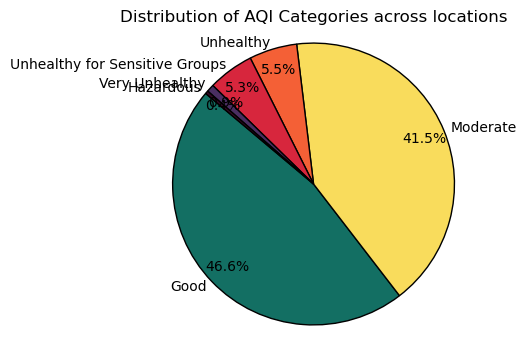

In [168]:
# 1. Group the data by 'AQI Category' and count the number of cities in each category
category_counts = cities_continents_merged['Overall_AQI_Category'].value_counts()
colors = ['#136F63', '#F9DC5C', '#F46036', '#D7263D', '#4A2E61', '#370926']

# 2. Plot the distribution of AQI Categories using a Pie chart
plt.figure(figsize=(4,4))
plt.pie(category_counts, 
        labels=category_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors,
        pctdistance=0.85, 
        labeldistance=1.05, 
        wedgeprops={'edgecolor': 'black'}) 

plt.title('Distribution of AQI Categories across locations')
plt.axis('equal')  
plt.show()

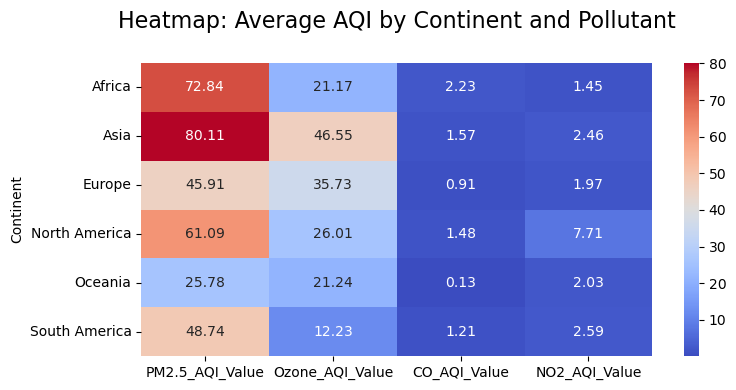

In [174]:
pollutants = ['PM2.5_AQI_Value','Ozone_AQI_Value', 'CO_AQI_Value', 'NO2_AQI_Value']

# Step 1: Calculate the average AQI values for each pollutant by continent
continent_data = cities_continents_merged.groupby('Continent')[pollutants].mean().reset_index()

# Step 2: Create a heatmap to visualize the pollutants across continents
heatmap_data = continent_data[pollutants].set_index(continent_data['Continent'])

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap: Average AQI by Continent and Pollutant\n', fontsize =16)
plt.tight_layout()
plt.show()



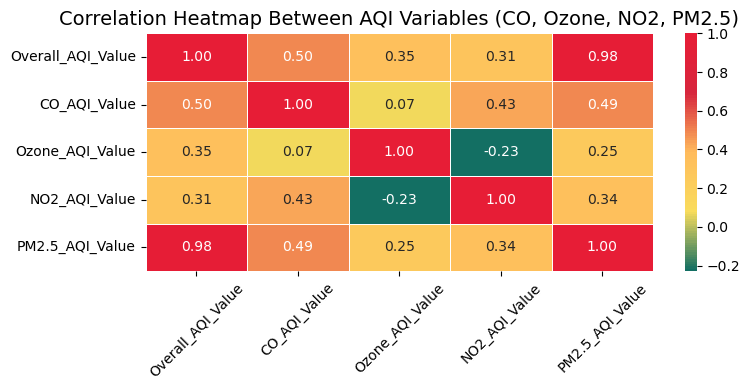

In [176]:
from matplotlib.colors import LinearSegmentedColormap

# Extract the AQI values for CO, Ozone, NO2, PM2.5, and overall AQI
required_columns = ['Overall_AQI_Value', 'CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']
data_for_corr = cities_continents_merged[required_columns]

# 2. Calculate the Pearson correlation matrix
correlation_matrix = data_for_corr.corr()

# 3. Define a custom colormap (green, yellow, orange, red)
colors = ['#136F63', '#F9DC5C', '#FFBB5C', '#D7263D', '#E71D36'] # Define colors in order
custom_cmap = LinearSegmentedColormap.from_list("green_yellow_orange_red", colors, N=100) # project color theme (help from xpert learning)

# 4. Plot the heatmap 
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt='.2f', linewidths=0.5)

# Title and labels
plt.title('Correlation Heatmap Between AQI Variables (CO, Ozone, NO2, PM2.5)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()



In [180]:
# Help from Xpert Learning Assistant
# Step 1: Group the data by 'Country' and calculate the required values (Q1, Q2, Q3, IQR)
country_stats = cities_continents_merged.groupby('Country')['Overall_AQI_Value'].describe(percentiles=[.25, .5, .75]).reset_index()

# Extract Q1 (25th percentile), Q2 (50th percentile), and Q3 (75th percentile)
country_stats['Q1'] = country_stats['25%']
country_stats['Q2'] = country_stats['50%']
country_stats['Q3'] = country_stats['75%']

# Calculate the IQR
country_stats['IQR'] = country_stats['Q3'] - country_stats['Q1']

# Step 2: Calculate the outlier bounds for each country
country_stats['Lower Bound'] = country_stats['Q1'] - 1.5 * country_stats['IQR']
country_stats['Upper Bound'] = country_stats['Q3'] + 1.5 * country_stats['IQR']

# Step 3: Identify outliers in the main dataframe (cities_continents_merged)
outliers = cities_continents_merged[cities_continents_merged.apply(
    lambda x: x['Overall_AQI_Value'] < country_stats.loc[country_stats['Country'] == x['Country'], 'Lower Bound'].values[0] or
              x['Overall_AQI_Value'] > country_stats.loc[country_stats['Country'] == x['Country'], 'Upper Bound'].values[0], axis=1)]

# Step 4: Count the number of outliers per country
outlier_count = outliers['Country'].value_counts()

# Step 5: Create a DataFrame to display the results
outlier_data = pd.DataFrame({
    'Country': country_stats['Country'],
    'Q1': country_stats['Q1'],
    'Q2': country_stats['Q2'],
    'Q3': country_stats['Q3'],
    'IQR': country_stats['IQR'],
    'Lower Bound': country_stats['Lower Bound'],
    'Upper Bound': country_stats['Upper Bound'],
    'Outliers': country_stats['Country'].map(outlier_count).fillna(0)  # Fill missing values with 0 (countries without outliers)
})
outlier_data.sort_values(by ='Outliers', ascending = False).head(10)

,Country,Q1,Q2,Q3,IQR,Lower Bound,Upper Bound,Outliers
165,United States,46.00,55.0,67.00,21.00,14.500,98.500,157.0
22,Brazil,25.00,36.0,52.00,27.00,-15.500,92.500,48.0
128,Russia,34.00,39.0,47.00,13.00,14.500,66.500,29.0
68,India,77.75,150.0,170.00,92.25,-60.625,308.375,28.0
77,Japan,41.00,47.0,59.00,18.00,14.000,86.000,26.0
109,Netherlands,34.00,37.0,39.75,5.75,25.375,48.375,25.0
123,Philippines,44.50,54.0,70.50,26.00,5.500,109.500,17.0
74,Italy,48.00,59.0,71.00,23.00,13.500,105.500,16.0
53,France,38.00,50.0,61.00,23.00,3.500,95.500,16.0
116,Pakistan,159.00,173.0,187.75,28.75,115.875,230.875,16.0


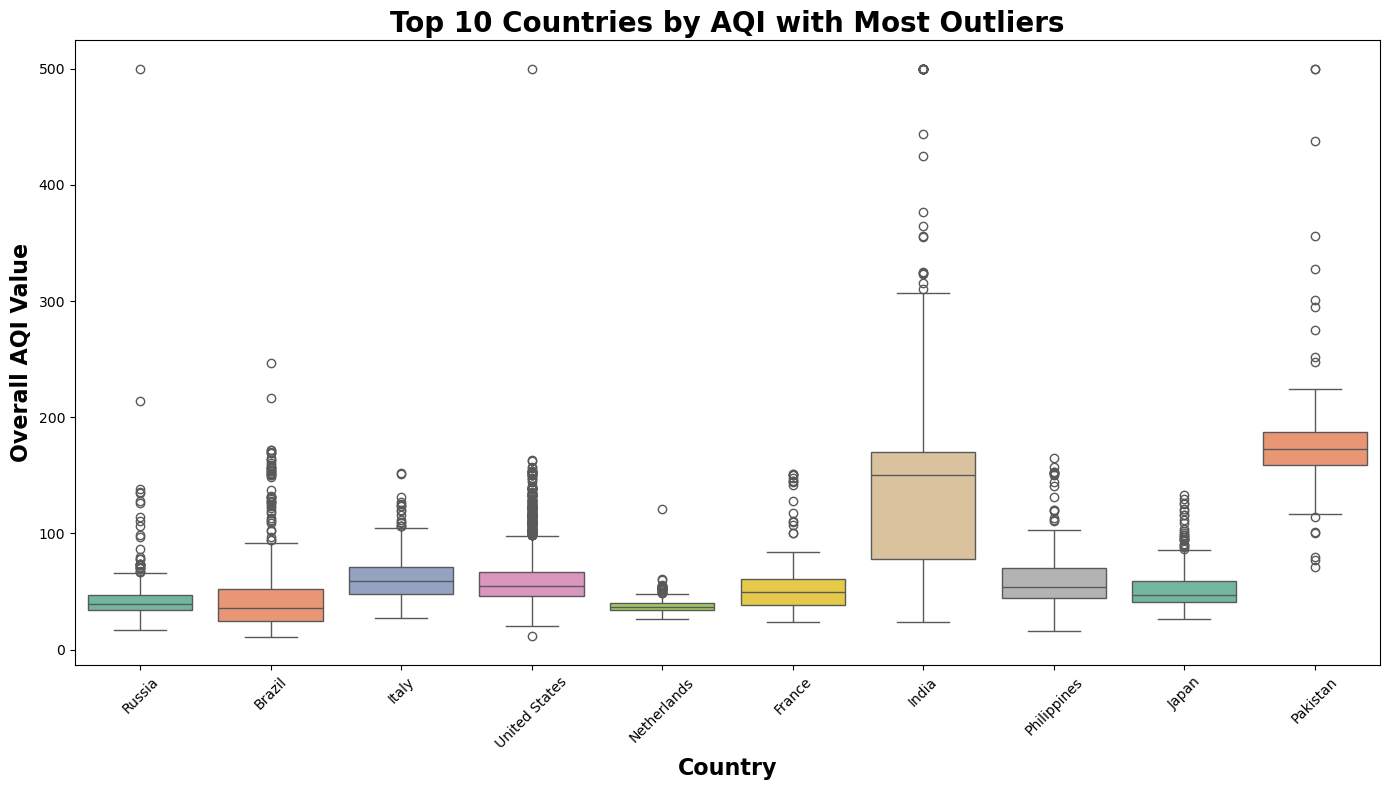

In [184]:
# Sort the 'outlier_data' DataFrame by the 'Outliers' column in descending order and select the top countries
top_outlier_countries = outlier_data.sort_values(by='Outliers', ascending=False).head(10)  

# Step 2: Filter the original dataframe to only include cities from the top countries
filtered_df = cities_continents_merged[cities_continents_merged['Country'].isin(top_outlier_countries['Country'])]

# Step 3: Create the box plot for AQI distribution by Country, focusing on countries with the most outliers
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='Overall_AQI_Value', data=filtered_df, hue = 'Country', palette="Set2")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Top 10 Countries by AQI with Most Outliers', fontsize=20, fontweight='bold')
plt.xlabel('Country', fontsize=16, fontweight='bold')
plt.ylabel('Overall AQI Value', fontsize=16, fontweight='bold')

# Show the plot with tight layout
plt.tight_layout()
plt.show()

In [189]:
# Help from ChatGPT
# Define the color map for AQI categories
aqi_category_colors = {
    'Good': '#006400',  # Green for Good
    'Moderate': '#FFFF00',  # Yellow for Moderate
    'Unhealthy for Sensitive People': '#FFA500',  # Orange for Unhealthy for Sensitive People
    'Unhealthy': '#FF0000',  # Red for Unhealthy
    'Very Unhealthy': '#800080',  # Purple for Very Unhealthy
    'Hazardous': '#8B0000'  # Dark Red for Hazardous
}

# Initialize the map centered at a global view
map = folium.Map(location=[10, 0], zoom_start=1, tiles='OpenStreetMap')

# Create a marker cluster to group markers
marker_cluster = MarkerCluster().add_to(map)

# Iterate over cities in your dataframe and add circle markers for each
for _, row in cities_continents_merged.iterrows():
    # Get the color for the AQI category
    aqi_category = row['Overall_AQI_Category']
    color = aqi_category_colors.get(aqi_category, '#808080')  # Default to grey if AQI category is not in the color map

    # Create the CircleMarker for each city
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=7,  
        color=color,  
        fill=True,
        fill_color=color,  
        fill_opacity=0.7,  
        popup=(
            f"City: {row['City']}<br>"
            f"AQI Category: {aqi_category}<br>"
            f"AQI Value: {row['Overall_AQI_Value']}<br>"
            f"Country: {row['Country']}<br>"
            f"Continent: {row['Continent']}<br>"
            f"Latitude: {row['Latitude']}<br>"
            f"Longitude: {row['Longitude']}"
        ),
        tooltip=(
            f"City: {row['City']}<br>"
            f"AQI Category: {aqi_category}<br>"
            f"AQI Value: {row['Overall_AQI_Value']}<br>"
            f"Country: {row['Country']}<br>"
            f"Continent: {row['Continent']}"
        ), 

    ).add_to(marker_cluster)

# Save the map as an HTML file
map.save("global_aqi_map.html")  


[Click here to view the map](global_aqi_map.html)
